### Import statements

In [20]:
import openml
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Load in datasets

In [21]:
benchmark_suite_CC18 = openml.study.get_suite('OpenML-CC18')  # obtain the benchmark suite
benchmark_suite_100 = openml.study.get_suite('OpenML100')  # obtain the benchmark suite

### Benchmark RandomForestClassifier and ExtraTreesClassifier with _default parameters_

#### The following sections use the OpenML CC-18 and 100 suites and classifies each dataset using the sklearn's RandomForest classifier and ExtraTrees classifier with default parameters. The task IDs, accuracies, and runtimes of each dataset are compiled into .txt files for later analysis

### RFClassifier

##### Build the scikit-learn ExtraTrees classifier

In [8]:
clf = sklearn.pipeline.make_pipeline(sklearn.preprocessing.Imputer(),
                                     sklearn.ensemble.RandomForestClassifier())

##### RF using OpenML CC-18

In [ ]:
for task_id in benchmark_suite_CC18.tasks:  # iterate over all tasks
    try:
        f = open("RF_accuracies_CC-18_21020.txt","a")
        startTime = datetime.now()
        task = openml.tasks.get_task(task_id) # download the OpenML task
        openml.config.apikey = 'c9ea8896542dd998ea42685f14e2bc14'  # set the OpenML Api Key
        run = openml.runs.run_model_on_task(clf, task) # run classifier on splits (requires API key)
        score = run.get_metric_fn(sklearn.metrics.accuracy_score) # print accuracy score
        print('Data set: %s; Accuracy: %0.2f' % (task.get_dataset().name,score.mean()))
        print('Time: '+ str(datetime.now() - startTime))
        f.write('%i,%s,%0.4f,%s,\n' % (task_id,task.get_dataset().name,score.mean(),str(datetime.now() - startTime)))
        f.close()
    except:
        print('Error in' + str(task_id))

##### RF using OpenML 100

In [ ]:
for task_id in benchmark_suite_100.tasks:  # iterate over all tasks
    try:
        f = open("RF_accuracies_100_21020.txt","a")
        startTime = datetime.now()
        task = openml.tasks.get_task(task_id) # download the OpenML task
        openml.config.apikey = 'c9ea8896542dd998ea42685f14e2bc14'  # set the OpenML Api Key
        run = openml.runs.run_model_on_task(clf, task) # run classifier on splits (requires API key)
        score = run.get_metric_fn(sklearn.metrics.accuracy_score) # print accuracy score
        print('Data set: %s; Accuracy: %0.2f' % (task.get_dataset().name,score.mean()))
        print('Time: '+ str(datetime.now() - startTime))
        f.write('%i,%s,%0.4f,%s,\n' % (task_id,task.get_dataset().name,score.mean(),str(datetime.now() - startTime)))
        f.close()
    except:
        print('Error in' + str(task_id))

### ExtraTrees Classifier
##### Build the scikit-learn ExtraTrees classifier

In [9]:
clf = sklearn.pipeline.make_pipeline(sklearn.preprocessing.Imputer(),
                                     sklearn.ensemble.ExtraTreesClassifier())

##### ET using OpenML CC-18

In [ ]:
for task_id in benchmark_suite_CC18.tasks:  # iterate over all tasks
    try:
        f = open("ET_accuracies_CC-18_21020.txt","a")
        startTime = datetime.now()
        task = openml.tasks.get_task(task_id) # download the OpenML task
        openml.config.apikey = 'c9ea8896542dd998ea42685f14e2bc14'  # set the OpenML Api Key
        run = openml.runs.run_model_on_task(clf, task) # run classifier on splits (requires API key)
        score = run.get_metric_fn(sklearn.metrics.accuracy_score) # print accuracy score
        print('Data set: %s; Accuracy: %0.2f' % (task.get_dataset().name,score.mean()))
        print('Time: '+ str(datetime.now() - startTime))
        f.write('%i,%s,%0.4f,%s,\n' % (task_id,task.get_dataset().name,score.mean(),str(datetime.now() - startTime)))
        f.close()
    except:
        print('Error in' + str(task_id))

##### ET using OpenML 100

In [ ]:
for task_id in benchmark_suite_100.tasks:  # iterate over all tasks
    try:
        f = open("ET_accuracies_100_21020.txt","a")
        startTime = datetime.now()
        task = openml.tasks.get_task(task_id) # download the OpenML task
        openml.config.apikey = 'c9ea8896542dd998ea42685f14e2bc14'  # set the OpenML Api Key
        run = openml.runs.run_model_on_task(clf, task) # run classifier on splits (requires API key)
        score = run.get_metric_fn(sklearn.metrics.accuracy_score) # print accuracy score
        print('Data set: %s; Accuracy: %0.2f' % (task.get_dataset().name,score.mean()))
        print('Time: '+ str(datetime.now() - startTime))
        f.write('%i,%s,%0.4f,%s,\n' % (task_id,task.get_dataset().name,score.mean(),str(datetime.now() - startTime)))
        f.close()
    except:
        print('Error in' + str(task_id))

### Compare accuracies and runtimes between RF and ET classifiers

#### The following sections compare the compiled accuracy and runtime results of both classifiers on the OpenML CC-18 and 100 suites. The accuracies and runtimes of each dataset are plotted against the dataset's number of features and number of samples.

### Load in dataset properties, accuracies, and runtimes

##### Obtain the properties of datasets in Open ML CC-18

In [22]:
dimen_CC18 = [] # for all datasets: number of samples (column 0), number of features (column 1) 

for task_id in benchmark_suite_CC18.tasks:  # iterate over all tasks
    try:
        task = openml.tasks.get_task(task_id)  # download the OpenML task
        features_CC18, targets_CC18 = task.get_X_and_y()  # load in dataset properties
        dimen_CC18.append(np.shape(features_CC18)) # compile all feature and sample numbers
    except:
        print('Error in OpenML CC-18 dataset ' + str(task_id)) # print task id of erring datasets

##### Obtain the properties of datasets in Open ML 100

In [23]:
dimen_100 = [] # for all datasets: number of samples (column 0), number of features (column 1)

for task_id in benchmark_suite_100.tasks:  # iterate over all tasks
    try:
        task = openml.tasks.get_task(task_id)  # download the OpenML task
        features_100, targets_100 = task.get_X_and_y()  # load in dataset properties
        dimen_100.append(np.shape(features_100)) # compile all feature and sample numbers
    except:
        print('Error in OpenML 100 dataset ' + str(task_id)) # print task id of erring datasets

Error in OpenML 100 dataset 34536


##### Read in RF accuracies of OpenML CC-18 datasets

In [24]:
acc_RF_CC18 = open('RF_accuracies_CC-18_21020.txt','r')

RF_taskID_CC18 = []
RF_name_CC18 = []
RF_accuracy_CC18 = []
RF_time_CC18 = []

for line in acc_RF_CC18:
    fields = line.split(',')
    RF_taskID_CC18.append(fields[0])
    RF_name_CC18.append(fields[1])
    RF_accuracy_CC18.append(float(fields[2]))
    RF_time_CC18.append(fields[3])

print(np.shape(RF_accuracy_CC18))

(72,)


##### Read in RF accuracies of OpenML 100 datasets

In [25]:
acc_RF_100 = open('RF_accuracies_100_21020.txt','r')

RF_taskID_100 = []
RF_name_100 = []
RF_accuracy_100 = []
RF_time_100 = []

for line in acc_RF_100:
    fields = line.split(',')
    RF_taskID_100.append(fields[0])
    RF_name_100.append(fields[1])
    RF_accuracy_100.append(float(fields[2]))
    RF_time_100.append(fields[3])

print(np.shape(RF_accuracy_100))

(99,)


##### Read in ET accuracies of OpenML CC-18 datasets

In [26]:
acc_ET_CC18 = open('ET_accuracies_CC-18_21020.txt','r')

ET_taskID_CC18 = []
ET_name_CC18 = []
ET_accuracy_CC18 = []
ET_time_CC18 = []
    
for line in acc_ET_CC18:
    fields = line.split(',')
    ET_taskID_CC18.append(fields[0])
    ET_name_CC18.append(fields[1])
    ET_accuracy_CC18.append(float(fields[2]))
    ET_time_CC18.append(fields[3])

print(np.shape(ET_accuracy_CC18))

(72,)


##### Read in ET accuracies of OpenML 100 datasets

In [27]:
acc_ET_100 = open('ET_accuracies_100_21020.txt','r')

ET_taskID_100 = []
ET_name_100 = []
ET_accuracy_100 = []
ET_time_100 = []

for line in acc_ET_100:
    fields = line.split(',')
    ET_taskID_100.append(fields[0])
    ET_name_100.append(fields[1])
    ET_accuracy_100.append(float(fields[2]))
    ET_time_100.append(fields[3])

print(np.shape(ET_accuracy_100))

(99,)


### Find RF vs. ET accuracy differences

##### OpenML CC-18

(array([ 1.,  0.,  0.,  0.,  3.,  7., 25., 27.,  4.,  5.]),
 array([-0.0784 , -0.06703, -0.05566, -0.04429, -0.03292, -0.02155,
        -0.01018,  0.00119,  0.01256,  0.02393,  0.0353 ]),
 <a list of 10 Patch objects>)

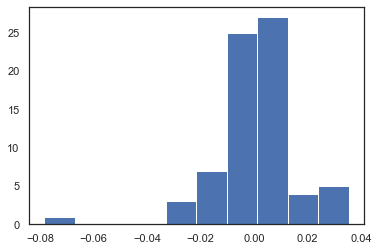

In [118]:
acc_diffs_CC18 = []

for i in range(len(ET_accuracy_CC18)):
    acc_diffs_CC18.append(ET_accuracy_CC18[i]-RF_accuracy_CC18[i])

plt.hist(acc_diffs_CC18)

##### OpenML 100

(array([ 1.,  1.,  9., 65., 19.,  3.,  0.,  0.,  0.,  1.]),
 array([-0.0784 , -0.05656, -0.03472, -0.01288,  0.00896,  0.0308 ,
         0.05264,  0.07448,  0.09632,  0.11816,  0.14   ]),
 <a list of 10 Patch objects>)

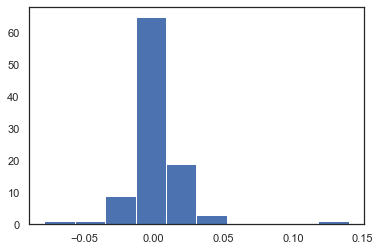

In [119]:
acc_diffs_100 = []

for i in range(len(ET_accuracy_100)):
    acc_diffs_100.append(ET_accuracy_100[i]-RF_accuracy_100[i])
    
plt.hist(acc_diffs_100)

### Plot RF vs. ET accuracy differences (scatterplot)

##### OpenML CC-18

###### Set up datapoints with the accuracy differences vs. number of features and number of samples, separately

In [83]:
n_features_CC18 = []
n_samples_CC18 = []

for i in range(len(ET_time_CC18)):
    n_features_CC18.append(dimen_CC18[i][1])
    n_samples_CC18.append(dimen_CC18[i][0])

n_features_CC18 = np.vstack((n_features_CC18, acc_diffs_CC18))
n_samples_CC18 = np.vstack((n_samples_CC18, acc_diffs_CC18))

###### Plot each dataset's accuracy difference against its number of features

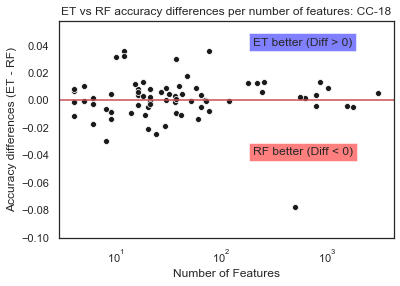

In [92]:
plt.figure()
sns.scatterplot(n_features_CC18[:][0],n_features_CC18[:][1],color='k')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy differences (ET - RF)')
plt.xscale('log')
plt.title('ET vs RF accuracy differences per number of features: CC-18')
plt.text(200, 0.04, "ET better (Diff > 0)", fontsize=12, bbox=dict(facecolor='blue', alpha=0.5))
plt.text(200, -0.04, "RF better (Diff < 0)", fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

# plt.figure()
sns.set(style="white")
# # tips = sns.load_dataset("tips")
# g = sns.jointplot('Number of Features','Accuracy differences (ET - RF)', data=n_features_CC18, kind="reg")

##### Plot each dataset's accuracy difference against its number of samples

Text(10000, -0.05, 'RF better (Diff < 0)')

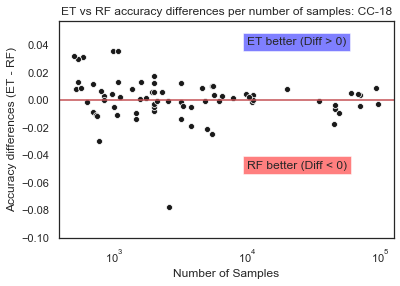

In [94]:
plt.figure()
sns.scatterplot(n_samples_CC18[:][0],n_samples_CC18[:][1],color='k')
plt.xlabel('Number of Samples')
plt.ylabel('Accuracy differences (ET - RF)')
plt.xscale('log')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('ET vs RF accuracy differences per number of samples: CC-18')
plt.text(10000, 0.04, "ET better (Diff > 0)", fontsize=12, bbox=dict(facecolor='blue', alpha=0.5))
plt.text(10000, -0.05, "RF better (Diff < 0)", fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

###### Plot each dataset's accuracy difference against its number of samples and number of features, with the marker size denoting the relative difference magnitude

ET was better for 39 out of 72 datasets in CC18
RF was better for 33 out of 72 datasets in CC18


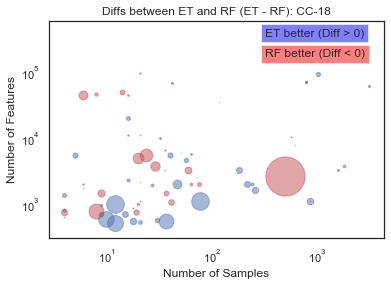

In [124]:
red_CC18 = 0
plt.figure()
for i in range(len(acc_diffs_CC18)):
    if acc_diffs_CC18[i] > 0:
        plt.plot(dimen_CC18[i][1],dimen_CC18[i][0],'bo',MarkerSize = (acc_diffs_CC18[i])*500,alpha=0.5)
    else:
        plt.plot(dimen_CC18[i][1],dimen_CC18[i][0],'ro',MarkerSize = (acc_diffs_CC18[i])*-500,alpha=0.5)
        red_CC18 += 1
plt.xlabel('Number of Samples')
plt.ylabel('Number of Features')
plt.xscale('log')
plt.yscale('log')
plt.ylim((300,600000))
plt.title('Diffs between ET and RF (ET - RF): CC-18')
# plt.legend(['RF better', 'ET better'])
plt.text(320, 350000, "ET better (Diff > 0)", fontsize=12, bbox=dict(facecolor='blue', alpha=0.5))
plt.text(320, 170000, "RF better (Diff < 0)", fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

print('ET was better for ' + str(72-red_CC18) + ' out of 72 datasets in CC18')
print('RF was better for ' + str(red_CC18) + ' out of 72 datasets in CC18')

##### OpenML 100

###### Set up datapoints with the accuracy differences vs. number of features and number of samples, separately

In [99]:
n_features_100 = []
n_samples_100 = []

for i in range(len(ET_time_100)):
    n_features_100.append(dimen_100[i][1])
    n_samples_100.append(dimen_100[i][0])

n_features_100 = np.vstack((n_features_100, acc_diffs_100))
n_samples_100 = np.vstack((n_samples_100, acc_diffs_100))

###### Plot each dataset's accuracy difference against its number of features

Text(200, -0.05, 'RF better (Diff < 0)')

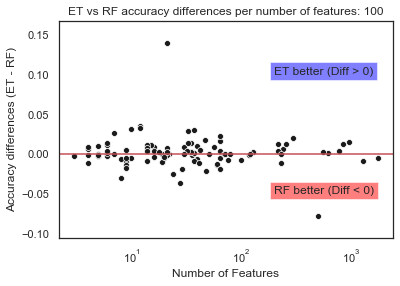

In [100]:
plt.figure()
sns.scatterplot(n_features_100[:][0],n_features_100[:][1],color='k')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy differences (ET - RF)')
plt.xscale('log')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('ET vs RF accuracy differences per number of features: 100')
plt.text(200, 0.10, "ET better (Diff > 0)", fontsize=12, bbox=dict(facecolor='blue', alpha=0.5))
plt.text(200, -0.05, "RF better (Diff < 0)", fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

###### Plot each dataset's accuracy difference against its number of samples

Text(10000, -0.05, 'RF better (Diff < 0)')

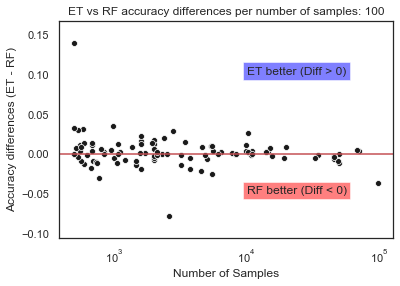

In [102]:
plt.figure()
sns.scatterplot(n_samples_100[:][0],n_samples_100[:][1],color='k')
plt.xlabel('Number of Samples')
plt.ylabel('Accuracy differences (ET - RF)')
plt.xscale('log')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('ET vs RF accuracy differences per number of samples: 100')
plt.text(10000, 0.10, "ET better (Diff > 0)", fontsize=12, bbox=dict(facecolor='blue', alpha=0.5))
plt.text(10000, -0.05, "RF better (Diff < 0)", fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

###### Plot each dataset's accuracy difference against its number of samples and number of features, with the marker size denoting the relative difference magnitude

ET was better for 50 out of 99 datasets in 100
RF was better for 49 out of 99 datasets in 100


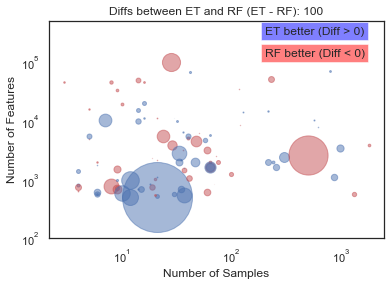

In [121]:
red_100 = 0
plt.figure()
for i in range(len(acc_diffs_100)):
    if acc_diffs_100[i] > 0:
        plt.plot(dimen_100[i][1],dimen_100[i][0],'bo',MarkerSize = (acc_diffs_100[i])*500,alpha=0.5)
    else:
        plt.plot(dimen_100[i][1],dimen_100[i][0],'ro',MarkerSize = (acc_diffs_100[i])*-500,alpha=0.5)
        red_100 += 1
plt.xlabel('Number of Samples')
plt.ylabel('Number of Features')
plt.xscale('log')
plt.yscale('log')
plt.ylim((100,500000))
plt.title('Diffs between ET and RF (ET - RF): 100')
plt.text(200, 290000, "ET better (Diff > 0)", fontsize=12, bbox=dict(facecolor='blue', alpha=0.5))
plt.text(200, 125000, "RF better (Diff < 0)", fontsize=12, bbox=dict(facecolor='red', alpha=0.5))
        
print('ET was better for ' + str(99-red_100) + ' out of 99 datasets in 100')
print('RF was better for ' + str(red_100) + ' out of 99 datasets in 100')

### Plot RF and ET runtimes (scatterplot)

##### OpenML CC-18

###### Set up time fields

In [104]:
# ET
ET_hours = []
ET_minutes = []
ET_seconds = []
ET_total_time = []
for time in ET_time_CC18:
    timefields = time.split(':')
    ET_hours.append(timefields[0])
    ET_minutes.append(timefields[1])
    ET_seconds.append(float(timefields[2]))
    ET_total_time.append(float(timefields[0])*3600 + float(timefields[1])*60 + float(timefields[2]))

# RF
RF_hours = []
RF_minutes = []
RF_seconds = []
RF_total_time = []
for time in RF_time_CC18:
    timefields = time.split(':')
    RF_hours.append(timefields[0])
    RF_minutes.append(timefields[1])
    RF_seconds.append(float(timefields[2]))
    RF_total_time.append(float(timefields[0])*3600 + float(timefields[1])*60 + float(timefields[2]))

###### Find ET vs. RF runtime differences

(array([67.,  1.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ -2.459442 ,  10.1194007,  22.6982434,  35.2770861,  47.8559288,
         60.4347715,  73.0136142,  85.5924569,  98.1712996, 110.7501423,
        123.328985 ]),
 <a list of 10 Patch objects>)

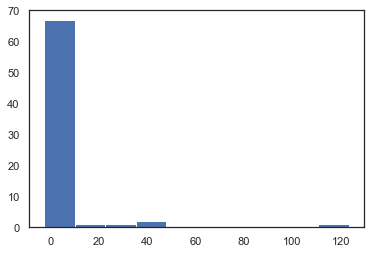

In [105]:
time_diffs_CC18 = []

for i in range(len(ET_time_CC18)):
    time_diffs_CC18.append(RF_total_time[i]-ET_total_time[i])

plt.hist(time_diffs_CC18)

###### Set up datapoints with the runtimes vs. number of features and number of samples, separately

In [106]:
n_features_CC18 = []
n_samples_CC18 = []

for i in range(len(ET_time_CC18)):
    n_features_CC18.append(dimen_CC18[i][1])
    n_samples_CC18.append(dimen_CC18[i][0])

n_features_CC18 = np.vstack((n_features_CC18, time_diffs_CC18))
n_samples_CC18 = np.vstack((n_samples_CC18, time_diffs_CC18))

###### Plot each dataset's runtime against its number of features

Text(0.5, 1.0, 'RF-ET Runtime Difference per number of features: CC-18')

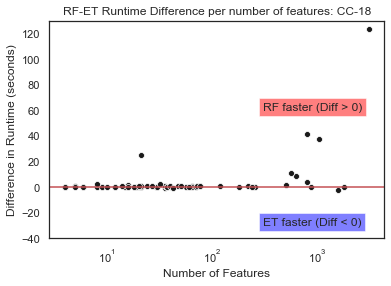

In [108]:
plt.figure()
sns.scatterplot(n_features_CC18[:][0],n_features_CC18[:][1], color='k')
plt.xlabel('Number of Features')
plt.ylabel('Difference in Runtime (seconds)')
plt.xscale('log')
# plt.yscale('log')
plt.ylim([-40,130])
plt.axhline(y=0, color='r', linestyle='-')
plt.text(300, 60, "RF faster (Diff > 0)", fontsize=12, bbox=dict(facecolor='red', alpha=0.5))
plt.text(300, -30, "ET faster (Diff < 0)", fontsize=12, bbox=dict(facecolor='blue', alpha=0.5))
plt.title('RF-ET Runtime Difference per number of features: CC-18')

###### Plot each dataset's runtime against its number of samples

Text(0.5, 1.0, 'RF-ET Runtime Difference per number of samples: CC-18')

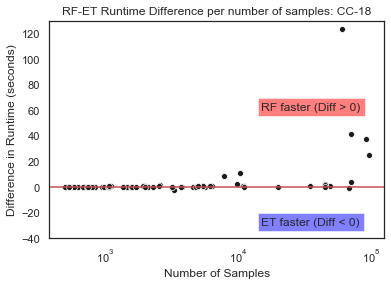

In [110]:
plt.figure()
sns.scatterplot(n_samples_CC18[:][0],n_samples_CC18[:][1],color='k')
plt.xlabel('Number of Samples')
plt.ylabel('Difference in Runtime (seconds)')
plt.xscale('log')
# plt.yscale('log')
plt.ylim([-40,130])
plt.axhline(y=0, color='r', linestyle='-')
plt.text(15000, 60, "RF faster (Diff > 0)", fontsize=12, bbox=dict(facecolor='red', alpha=0.5))
plt.text(15000, -30, "ET faster (Diff < 0)", fontsize=12, bbox=dict(facecolor='blue', alpha=0.5))
plt.title('RF-ET Runtime Difference per number of samples: CC-18')

###### Plot each dataset's runtime against its number of samples and number of features, with the marker size denoting the relative runtime magnitude

ET was faster for 57 out of 72 datasets in CC18
RF was faster for 15 out of 72 datasets in CC18


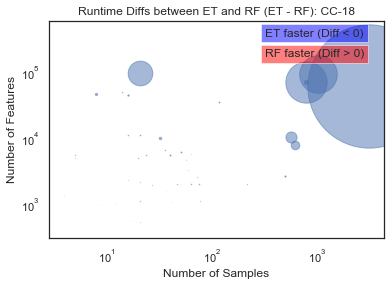

In [111]:
red_CC18 = 0
plt.figure()
for i in range(len(time_diffs_CC18)):
    if time_diffs_CC18[i] > 0:
        plt.plot(dimen_CC18[i][1],dimen_CC18[i][0],'bo',MarkerSize = (time_diffs_CC18[i]),alpha=0.5)
    else:
        plt.plot(dimen_CC18[i][1],dimen_CC18[i][0],'ro',MarkerSize = (time_diffs_CC18[i]),alpha=0.5)
        red_CC18 += 1
plt.xlabel('Number of Samples')
plt.ylabel('Number of Features')
plt.xscale('log')
plt.yscale('log')
plt.ylim((300,600000))
plt.title('Runtime Diffs between ET and RF (ET - RF): CC-18')
# plt.legend(['RF better', 'ET better'])
plt.text(320, 350000, "ET faster (Diff < 0)", fontsize=12, bbox=dict(facecolor='blue', alpha=0.5))
plt.text(320, 170000, "RF faster (Diff > 0)", fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

print('ET was faster for ' + str(72-red_CC18) + ' out of 72 datasets in CC18')
print('RF was faster for ' + str(red_CC18) + ' out of 72 datasets in CC18')

##### OpenML 100

###### Set up time fields

In [112]:
# ET
ET_hours = []
ET_minutes = []
ET_seconds = []
ET_total_time = []
for time in ET_time_100:
    timefields = time.split(':')
    ET_hours.append(timefields[0])
    ET_minutes.append(timefields[1])
    ET_seconds.append(float(timefields[2]))
    ET_total_time.append(float(timefields[0])*3600 + float(timefields[1])*60 + float(timefields[2]))

# RF
RF_hours = []
RF_minutes = []
RF_seconds = []
RF_total_time = []
for time in RF_time_100:
    timefields = time.split(':')
    RF_hours.append(timefields[0])
    RF_minutes.append(timefields[1])
    RF_seconds.append(float(timefields[2]))
    RF_total_time.append(float(timefields[0])*3600 + float(timefields[1])*60 + float(timefields[2]))

###### Find ET vs. RF runtime differences

(array([88.,  4.,  3.,  3.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-1.253413,  1.904493,  5.062399,  8.220305, 11.378211, 14.536117,
        17.694023, 20.851929, 24.009835, 27.167741, 30.325647]),
 <a list of 10 Patch objects>)

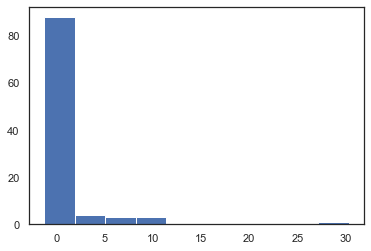

In [113]:
time_diffs_100 = []

for i in range(len(ET_time_100)):
    time_diffs_100.append(RF_total_time[i]-ET_total_time[i])

plt.hist(time_diffs_100)

###### Set up datapoints with the runtimes vs. number of features and number of samples, separately

In [114]:
n_features_100 = []
n_samples_100 = []

for i in range(len(ET_time_100)):
    n_features_100.append(dimen_100[i][1])
    n_samples_100.append(dimen_100[i][0])

n_features_100 = np.vstack((n_features_100, time_diffs_100))
n_samples_100 = np.vstack((n_samples_100, time_diffs_100))

###### Plot each dataset's runtime against its number of features

Text(0.5, 1.0, 'RF-ET Runtime Difference per number of features: 100')

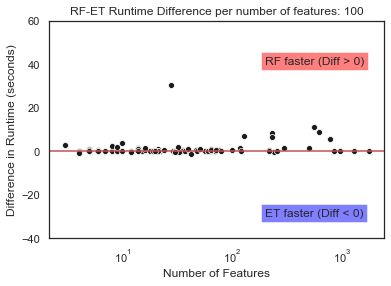

In [115]:
plt.figure()
sns.scatterplot(n_features_100[:][0],n_features_100[:][1], color='k')
plt.xlabel('Number of Features')
plt.ylabel('Difference in Runtime (seconds)')
plt.xscale('log')
# plt.yscale('log')
plt.ylim([-40,60])
plt.axhline(y=0, color='r', linestyle='-')
plt.text(200, 40, "RF faster (Diff > 0)", fontsize=12, bbox=dict(facecolor='red', alpha=0.5))
plt.text(200, -30, "ET faster (Diff < 0)", fontsize=12, bbox=dict(facecolor='blue', alpha=0.5))
plt.title('RF-ET Runtime Difference per number of features: 100')

###### Plot each dataset's runtime against its number of samples

Text(0.5, 1.0, 'RF-ET Runtime Difference per number of samples: 100')

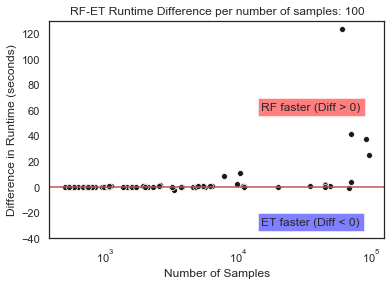

In [116]:
plt.figure()
sns.scatterplot(n_samples_CC18[:][0],n_samples_CC18[:][1],color='k')
plt.xlabel('Number of Samples')
plt.ylabel('Difference in Runtime (seconds)')
plt.xscale('log')
# plt.yscale('log')
plt.ylim([-40,130])
plt.axhline(y=0, color='r', linestyle='-')
plt.text(15000, 60, "RF faster (Diff > 0)", fontsize=12, bbox=dict(facecolor='red', alpha=0.5))
plt.text(15000, -30, "ET faster (Diff < 0)", fontsize=12, bbox=dict(facecolor='blue', alpha=0.5))
plt.title('RF-ET Runtime Difference per number of samples: 100')

###### Plot each dataset's runtime against its number of samples and number of features, with the marker size denoting the relative runtime magnitude

ET was faster for 72 out of 72 datasets in 100
RF was faster for 0 out of 72 datasets in 100


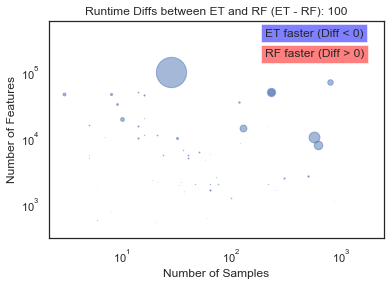

In [117]:
red_100 = 0
plt.figure()
for i in range(len(time_diffs_100)):
    if time_diffs_100[i] > 0:
        plt.plot(dimen_100[i][1],dimen_100[i][0],'bo',MarkerSize = (time_diffs_100[i]),alpha=0.5)
    else:
        plt.plot(dimen_100[i][1],dimen_100[i][0],'ro',MarkerSize = (time_diffs_100[i]),alpha=0.5)
        red_CC18 += 1
plt.xlabel('Number of Samples')
plt.ylabel('Number of Features')
plt.xscale('log')
plt.yscale('log')
plt.ylim((300,600000))
plt.title('Runtime Diffs between ET and RF (ET - RF): 100')
# plt.legend(['RF better', 'ET better'])
plt.text(200, 350000, "ET faster (Diff < 0)", fontsize=12, bbox=dict(facecolor='blue', alpha=0.5))
plt.text(200, 170000, "RF faster (Diff > 0)", fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

print('ET was faster for ' + str(72-red_100) + ' out of 72 datasets in 100')
print('RF was faster for ' + str(red_100) + ' out of 72 datasets in 100')

### Benchmark RandomForestClassifier and ExtraTreesClassifier with _optimized hyperparameters_

#### The following sections use the OpenML CC-18 and 100 suites and classifies each dataset using the sklearn's RandomForest classifier and ExtraTrees classifier with optimized hyperparameters. The task IDs, accuracies, and runtimes of each dataset are compiled into .txt files for later analysis